In [1]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from stable_baselines3 import DQN

In [3]:
model = DQN.load('../best_model/dqn/CnnPolicy/best_model.zip')
dqn_net = model.q_net
# model = DQN.load('../output_models/dqn/CnnPolicy/2022-05-30_22_25_06_94.zip')


# X = np.load('../best_model/dqn/CnnPolicy/observations.npy')
# X = torch.Tensor(X)
# X.shape

In [4]:
model.load_replay_buffer("../best_model/dqn/CnnPolicy/best_model_rb")
X = model.replay_buffer.observations[:1000]
X = torch.Tensor(X)
X.shape

torch.Size([1000, 1, 1, 10, 7])

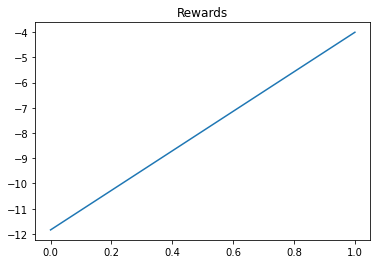

In [5]:
plot_rewards("../best_model/dqn/CnnPolicy/best_model_rewards.csv")

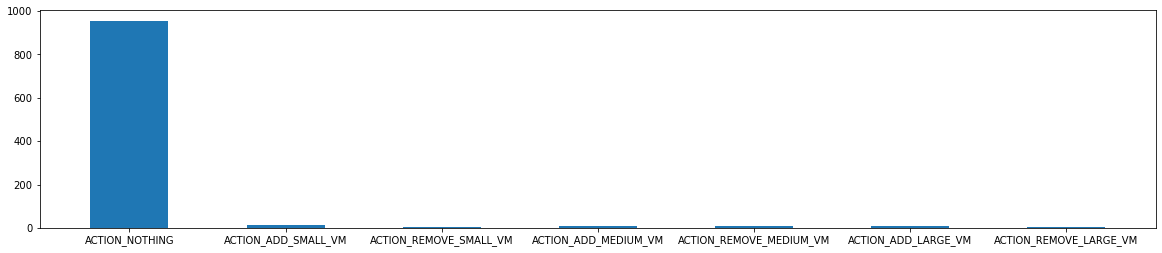

In [6]:
plot_action_histogram(model, X)

In [22]:
ig_attributor = IGAttributor(net=dqn_net,
                            policy='cnn',
                            agent='dqn',
                            data=X[700:900])
mean_attributions = ig_attributor.get_mean_attributions()

torch.Size([200, 1, 10, 7])


In [23]:
dqn_net.forward(X[0])

tensor([[ 0.0478, -0.0447,  0.0423, -0.0575,  0.0419, -0.0064,  0.0217]],
       grad_fn=<AddmmBackward0>)

In [24]:
plot_mean_attributions(mean_attributions=mean_attributions, policy='cnn')

Sum of attributions equals 0
Sum of attributions equals 0
Sum of attributions equals 0
Sum of attributions equals 0
Sum of attributions equals 0
Sum of attributions equals 0
Sum of attributions equals 0


In [25]:
ig_attributor.explain_example(idx=1)

torch.Size([200, 1, 1, 10, 7])
torch.Size([1, 1, 10, 7])
Action made: ACTION_NOTHING
Q-values:
ACTION_NOTHING: 0.047802116721868515
ACTION_ADD_SMALL_VM: -0.0447358675301075
ACTION_REMOVE_SMALL_VM: 0.042327456176280975
ACTION_ADD_MEDIUM_VM: -0.057454608380794525
ACTION_REMOVE_MEDIUM_VM: 0.04188452288508415
ACTION_ADD_LARGE_VM: -0.006389051675796509
ACTION_REMOVE_LARGE_VM: 0.021677818149328232
Sum of attributions equals 0
Sum of attributions equals 0
Sum of attributions equals 0
Sum of attributions equals 0
Sum of attributions equals 0
Sum of attributions equals 0
Sum of attributions equals 0


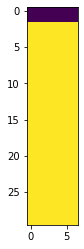

In [133]:
import matplotlib.pyplot as plt
img = X[0]
# img = np.transpose(img.cpu().detach().numpy()[0], (1, 2))
img = img.squeeze()
img.shape
img = img + 0.7
img[0:2, :] *= 0.1
imgplot = plt.imshow(img)

In [32]:
X_manual = torch.Tensor([[[
    [[0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1]],
    # [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    # [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ]]])

In [33]:
X_manual.shape

torch.Size([1, 1, 1, 10, 7])

In [34]:
ig_attributor = IGAttributor(net=dqn_net,
                            policy='cnn',
                            agent='dqn',
                            data=X_manual)

torch.Size([1, 1, 10, 7])


torch.Size([1, 1, 1, 10, 7])
torch.Size([1, 1, 10, 7])
Action made: ACTION_NOTHING
Q-values:
ACTION_NOTHING: 0.06463735550642014
ACTION_ADD_SMALL_VM: -0.08389327675104141
ACTION_REMOVE_SMALL_VM: 0.04306372255086899
ACTION_ADD_MEDIUM_VM: -0.05285155400633812
ACTION_REMOVE_MEDIUM_VM: 0.03967861458659172
ACTION_ADD_LARGE_VM: -0.0068174563348293304
ACTION_REMOVE_LARGE_VM: 0.023430166766047478


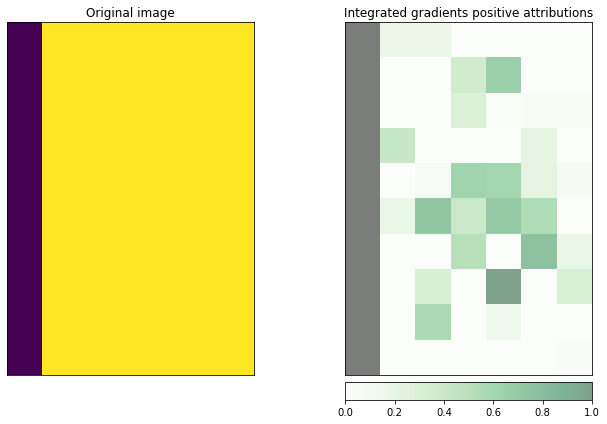

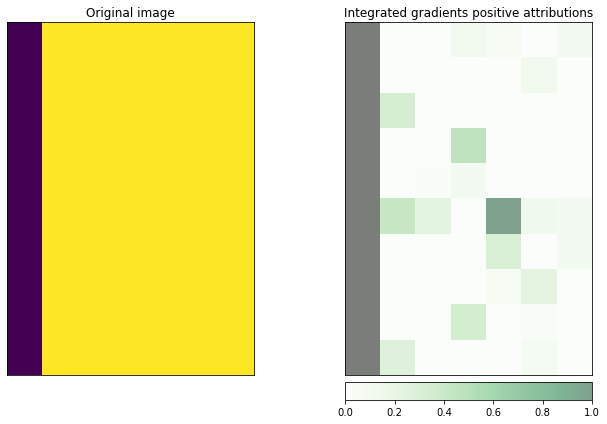

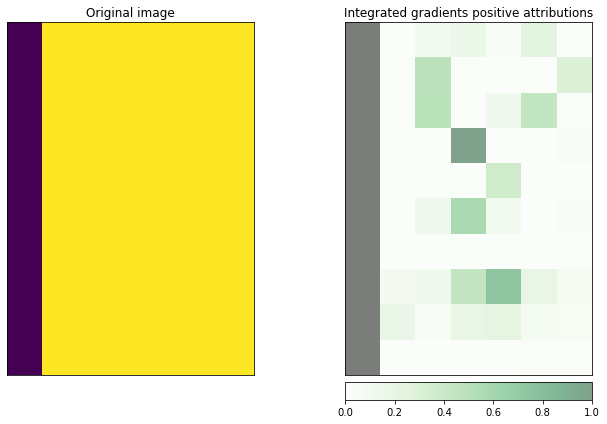

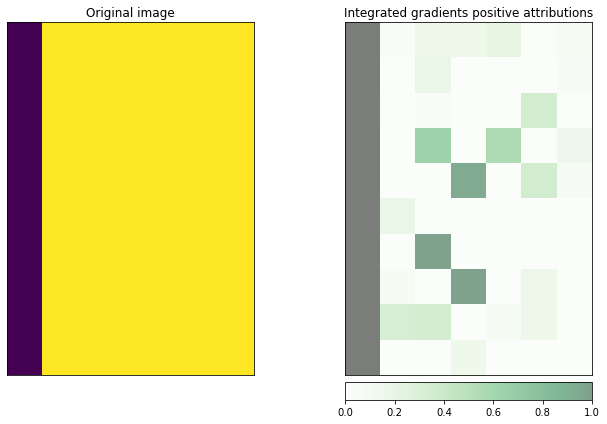

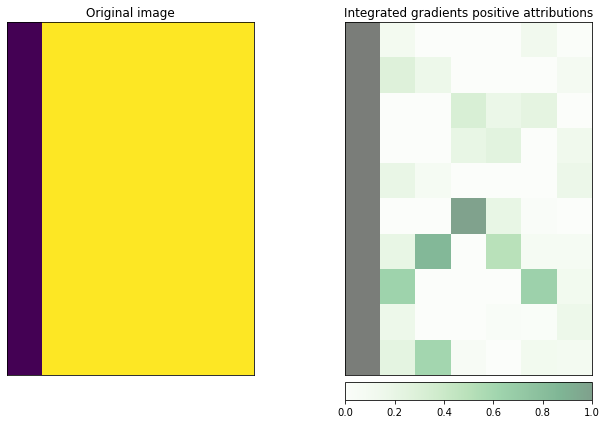

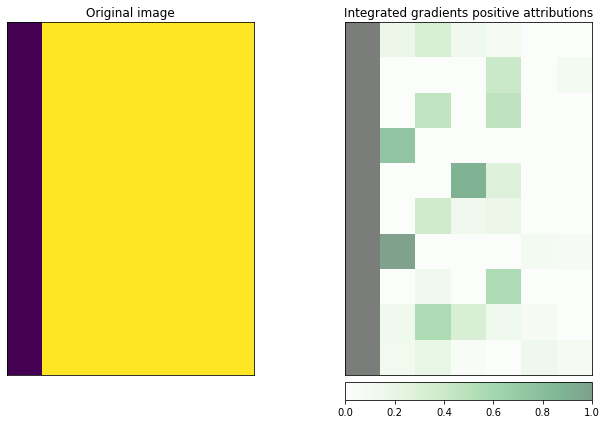

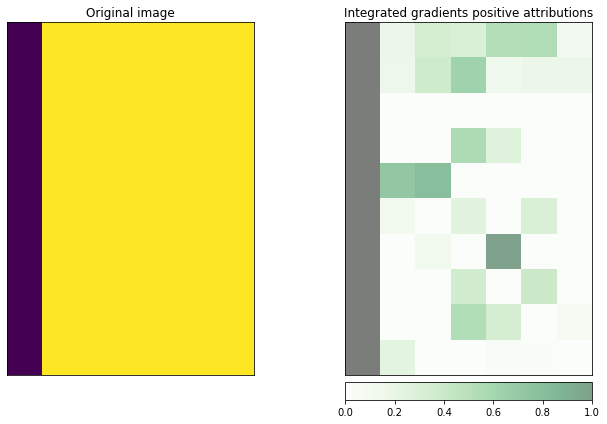

In [35]:
ig_attributor.explain_example(idx=0)